<div style="text-align: center; color: black; font-family: Arial, sans-serif;>
	<div style=border: 1px solid black; border-radius: 10px; padding: 10px; background-color: lightgray;">
		<h1>1. Yield module demonstration</h1>
		<h5>Politecnico di Milano - Summer Internship</h5>
		<h5>Internship supervisor : Prof. Carmelo Cammalleri</h5>
		<h5>Enzo Fortin - 2025</h5>
	</div>
</div>

The ***yield_analysis*** module contains all the functions for standardizing, processing, and visualizing agricultural yield data (wheat).

- **data_standardization** (ds_ya): Functions to harmonize and clean yield data from different sources and regions, ensuring consistency for further analysis.
- **data_processing** (dp_ya): Tools to compute yield anomalies, extract relevant statistics, and prepare datasets for visualization or correlation analysis.
- **visualization** (vis_ya): Methods to plot time series, anomaly maps, and coverage indicators, helping to interpret yield variability across regions and years.

---

In [ ]:
### Set the working directory to the project root if currently in the notebooks folder
import os
current_dir = os.getcwd()
notebooks_dir = os.path.join(os.path.dirname(current_dir), "docs-notebooks")

if os.path.basename(current_dir) == "docs-notebooks":
	os.chdir(os.path.dirname(current_dir))
print("Working directory:", os.getcwd())

Working directory: c:\Users\enzof\Documents\Ecole\Cours\Stage_2A\drought-swa-yield_anom


#### Imports

In [74]:
import src.yield_analysis.data_standardization as ds_ya
import src.yield_analysis.data_processing as dp_ya
import src.yield_analysis.visualization as vis_ya

from src.config import config

from IPython.display import Image, display

# Data Standardization

The data standardization part is essential to ensure that the area and production data from different sources are harmonized.


In [56]:
# Region selection
print("Available regions: europe, usa, china, canada, argentina, brazil, india")
selected_region = input("Select a region (e.g., 'europe', 'usa', 'china', 'canada', 'argentina', 'brazil', 'india'): ").strip().lower()
print(f"Selected region: {selected_region}")

Available regions: europe, usa, china, canada, argentina, brazil, india
Selected region: europe


In [41]:
# Data before standardization
import pandas as pd
import os

for file in os.listdir(f"{config.yield_config.DATA_DIR}/{selected_region}"):
	if file.endswith(".csv"):
		with open(f"{config.yield_config.DATA_DIR}/{selected_region}/{file}", 'r') as f:
			df = pd.read_csv(f)
			print(f"Header of {file}:\n{df.iloc[:10, :7]}\n")
	if file.endswith(".xlsx"):
		with open(f"{config.yield_config.DATA_DIR}/{selected_region}/{file}", 'rb') as f:
			df = pd.read_excel(f)
			# Afficher les premières colonnes du fichier Excel
			print(f"Part of {file}:\n{df.iloc[:10, :7]}\n")


Part of Cereal_area_excluding_Rice_China_1991_2022.xlsx:
                   Database: Annual data by province  Unnamed: 1  Unnamed: 2  \
0  Indicator: Cereal  area (Excluding Rice) (thou...         NaN         NaN   
1                                    Time: 1991-2022         NaN         NaN   
2                                             Region     2022.00     2021.00   
3                                            Beijing       71.01       57.25   
4                                            Tianjin      315.16      310.96   
5                                              Hebei     6020.64     6030.94   
6                                             Shanxi     2818.93     2797.45   
7                                     Inner Mongolia     5282.17     5416.74   
8                                           Liaoning     2866.50     2848.47   
9                                              Jilin     4549.23     4529.32   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  
0         

In [57]:
# Data Standardization
os.system(f"python scripts/yield_script.py -ds --region {selected_region}")
# Open the processed data

for file in os.listdir(f"{config.yield_config.DATA_STANDARDIZED_DIR}/{selected_region}"):
	print(file)
	if file.endswith(".csv"):
		with open(f"{config.yield_config.DATA_STANDARDIZED_DIR}/{selected_region}/{file}", 'r') as f:
			df = pd.read_csv(f)
			print(f"Header of {file}:\n{df.iloc[:10, :7]}\n")
	if file.endswith(".xlsx"):
		with open(f"{config.yield_config.DATA_STANDARDIZED_DIR}/{selected_region}/{file}", 'rb') as f:
			df = pd.read_excel(f)
			# Afficher les premières colonnes du fichier Excel
			print(f"Part of {file}:\n{df.iloc[:10, :7]}\n")


area_europe_standardized.xlsx
Part of area_europe_standardized.xlsx:
   Name Northwest   South Sicilia Sardegna Northeast Central
0    ID        63      64     113      114        66      67
1  CODE       ITC     ITF    ITG1     ITG2       ITH     ITI
2  1991     647.5  1162.7     397    120.1       792   894.7
3  1992     640.4  1097.6     365    116.6     811.3   789.7
4  1993     647.3   994.6     306    109.5     831.8   761.6
5  1994     579.2  1090.6     334    107.2     802.6   759.6
6  1995       NaN     NaN     NaN      NaN       NaN     NaN
7  1996     678.1  1177.9   384.2    142.6     849.6     753
8  1997     639.7  1215.7   398.5      150     798.2   751.6
9  1998     623.5  1208.1   341.3    150.6     786.3   735.3

prod_europe_standardized.xlsx
Part of prod_europe_standardized.xlsx:
   Name Northwest   South Sicilia Sardegna Northeast Central
0    ID        63      64     113      114        66      67
1  CODE       ITC     ITF    ITG1     ITG2       ITH     ITI
2  1991

# Data Processing

The data processing part takes the standardized yield data and computes yield anomalies, aggregates statistics, and prepares datasets for further analysis or visualization.

In practice, the corresponding Python script is mainly called by the visualization script.
Here, we only produce the prod_anom files, which are then used for the final correlation calculation with SWA data.
This step prepares the necessary anomaly datasets for further analysis and visualization, rather than performing the full analysis directly in this notebook.

In [64]:
# Data Processing
os.system(f"python scripts/yield_script.py -dp --get_prod_anom --region {selected_region}")
# Data after processing
with open(f"{config.yield_config.OUTPUT_DIR}/{selected_region}_prod_anom-{config.start_year}_{config.end_year}.xlsx", "rb") as f:
	df = pd.read_excel(f)
	print(f"Header of {selected_region}_prod_anom.xlsx:\n{df.iloc[:10, :7]}\n")

Header of europe_prod_anom.xlsx:
   year        AL       AT1       AT2       AT3  BA        BE
0  1991 -1.048127  0.239339  0.740480 -0.029623 NaN  0.103068
1  1992  0.539868  0.091966 -1.371108  0.107758 NaN -0.238612
2  1993  1.343302 -0.765532  0.609760 -0.115498 NaN  0.414882
3  1994 -1.760175  0.417003  0.294472  0.070016 NaN -0.392874
4  1995  2.197699  0.197187 -0.253420  0.098460 NaN -0.547738
5  1996 -2.432025 -0.282041 -0.633721 -0.589659 NaN  1.195929
6  1997  1.129253 -0.010198  1.181172  0.639509 NaN -0.230514
7  1998  0.498116 -0.021245 -0.356606 -0.158422 NaN -0.564624
8  1999 -1.659087  0.860481 -0.767304  0.082411 NaN  0.163774
9  2000  1.599498 -1.478441  0.808672 -0.068031 NaN  0.080425



# Data Visualization

The data visualization part uses the processed yield anomaly datasets to create informative plots and maps.
.


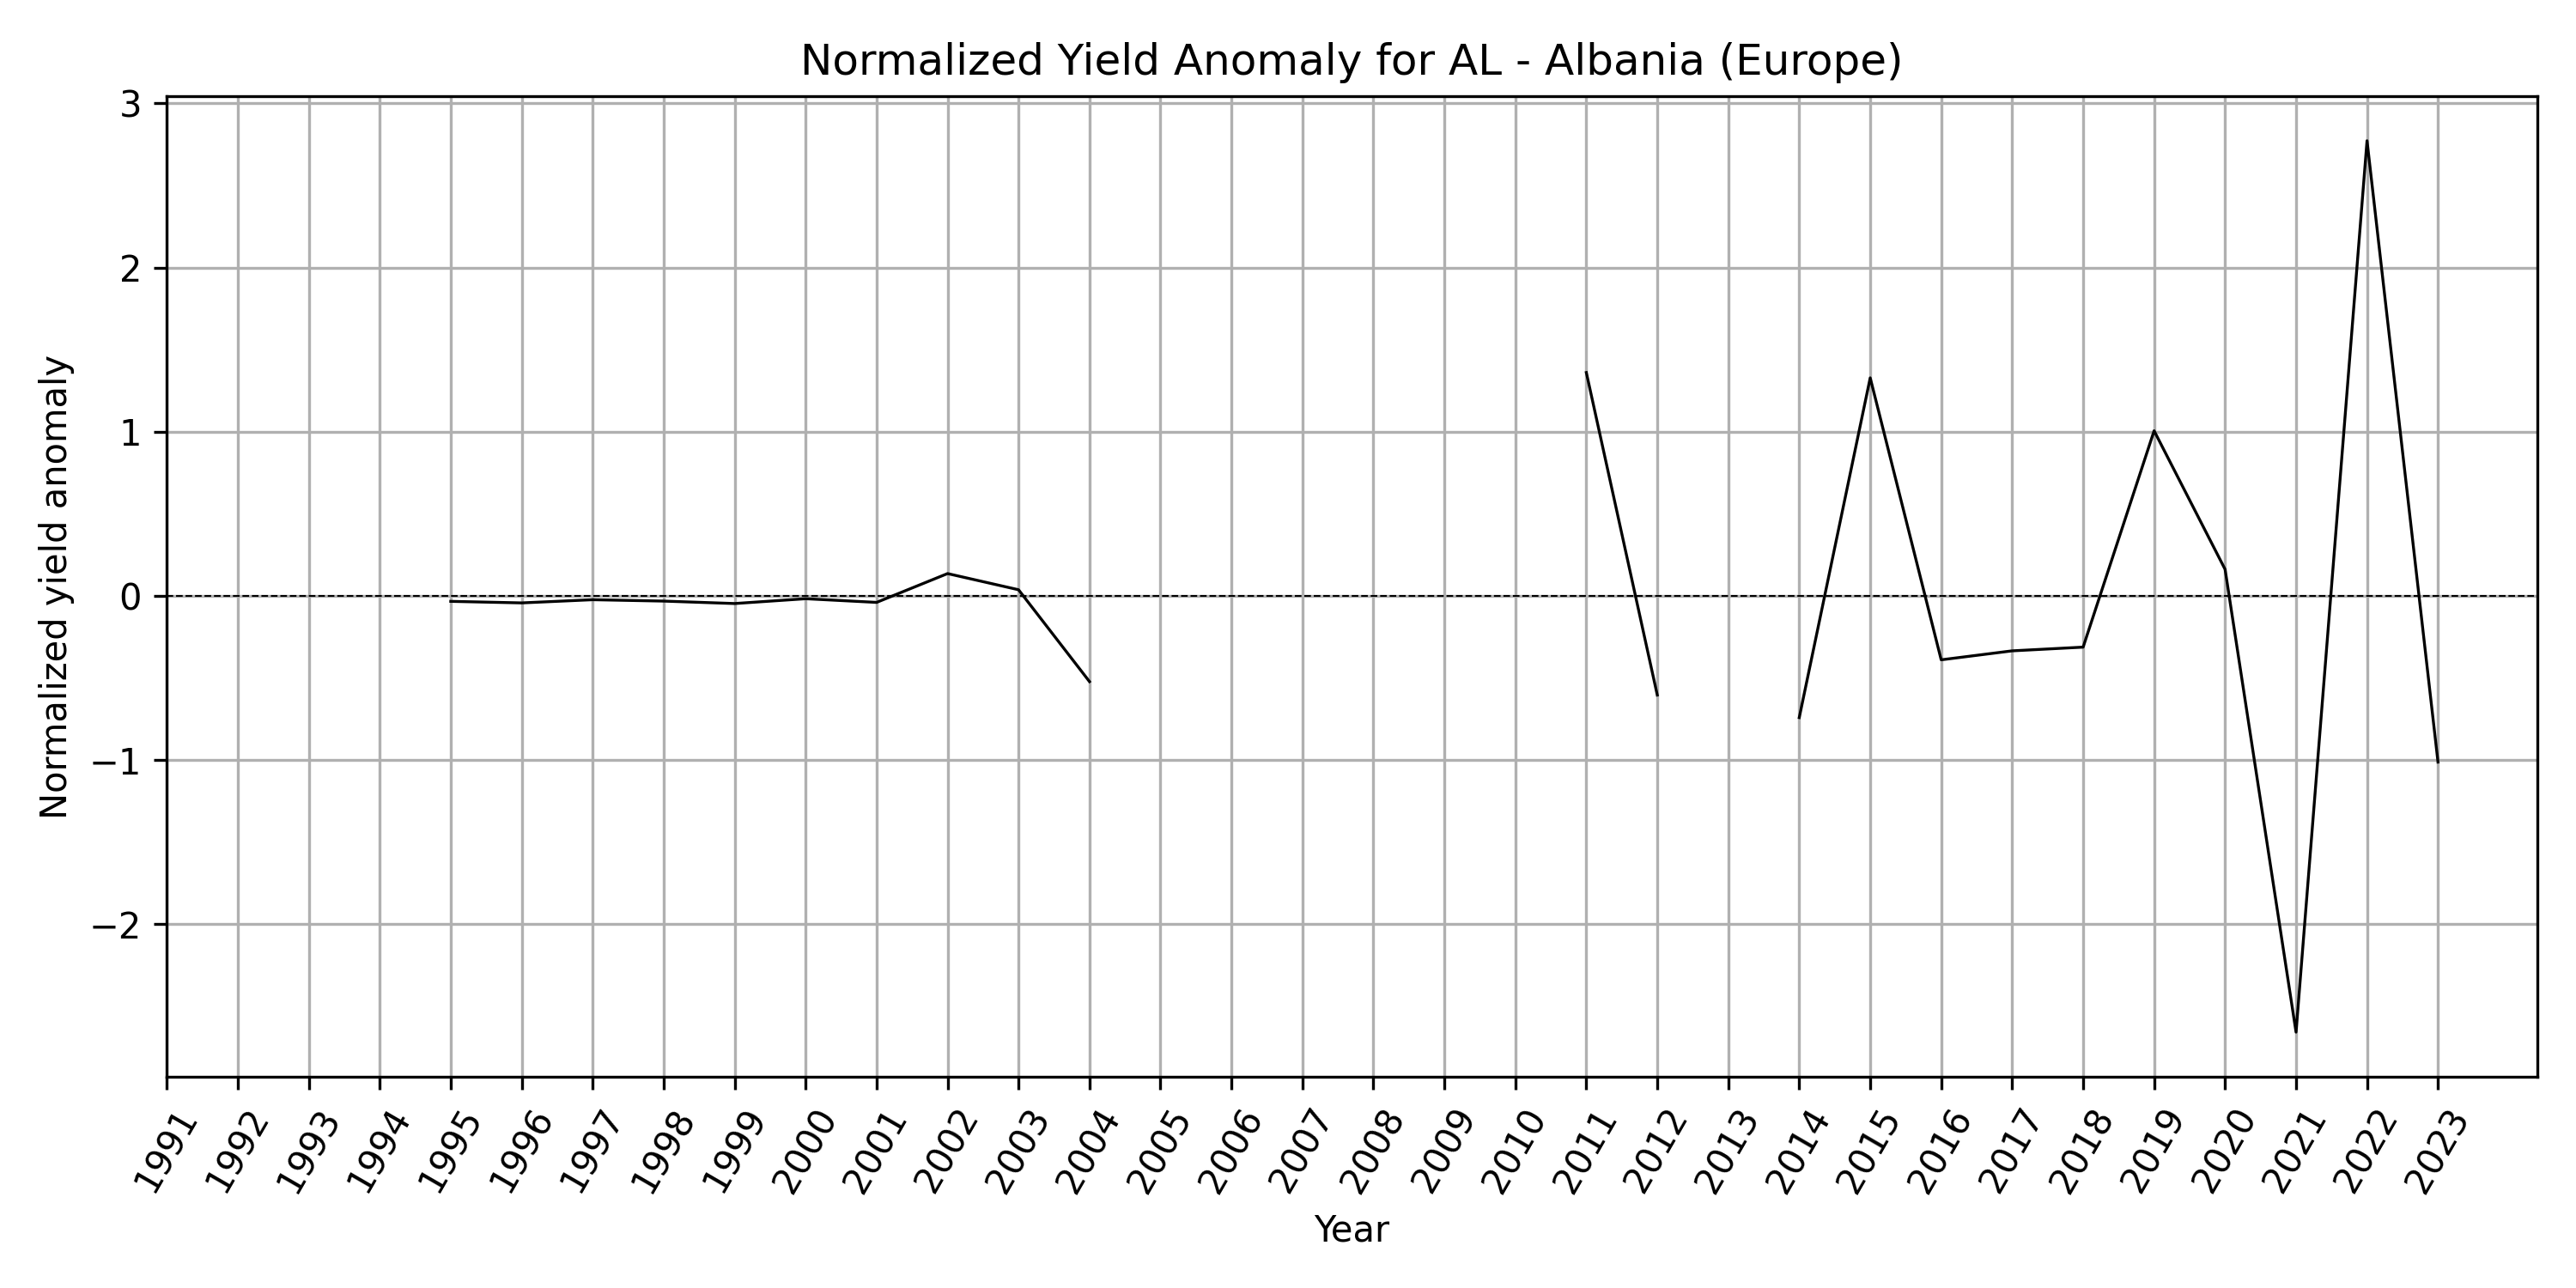

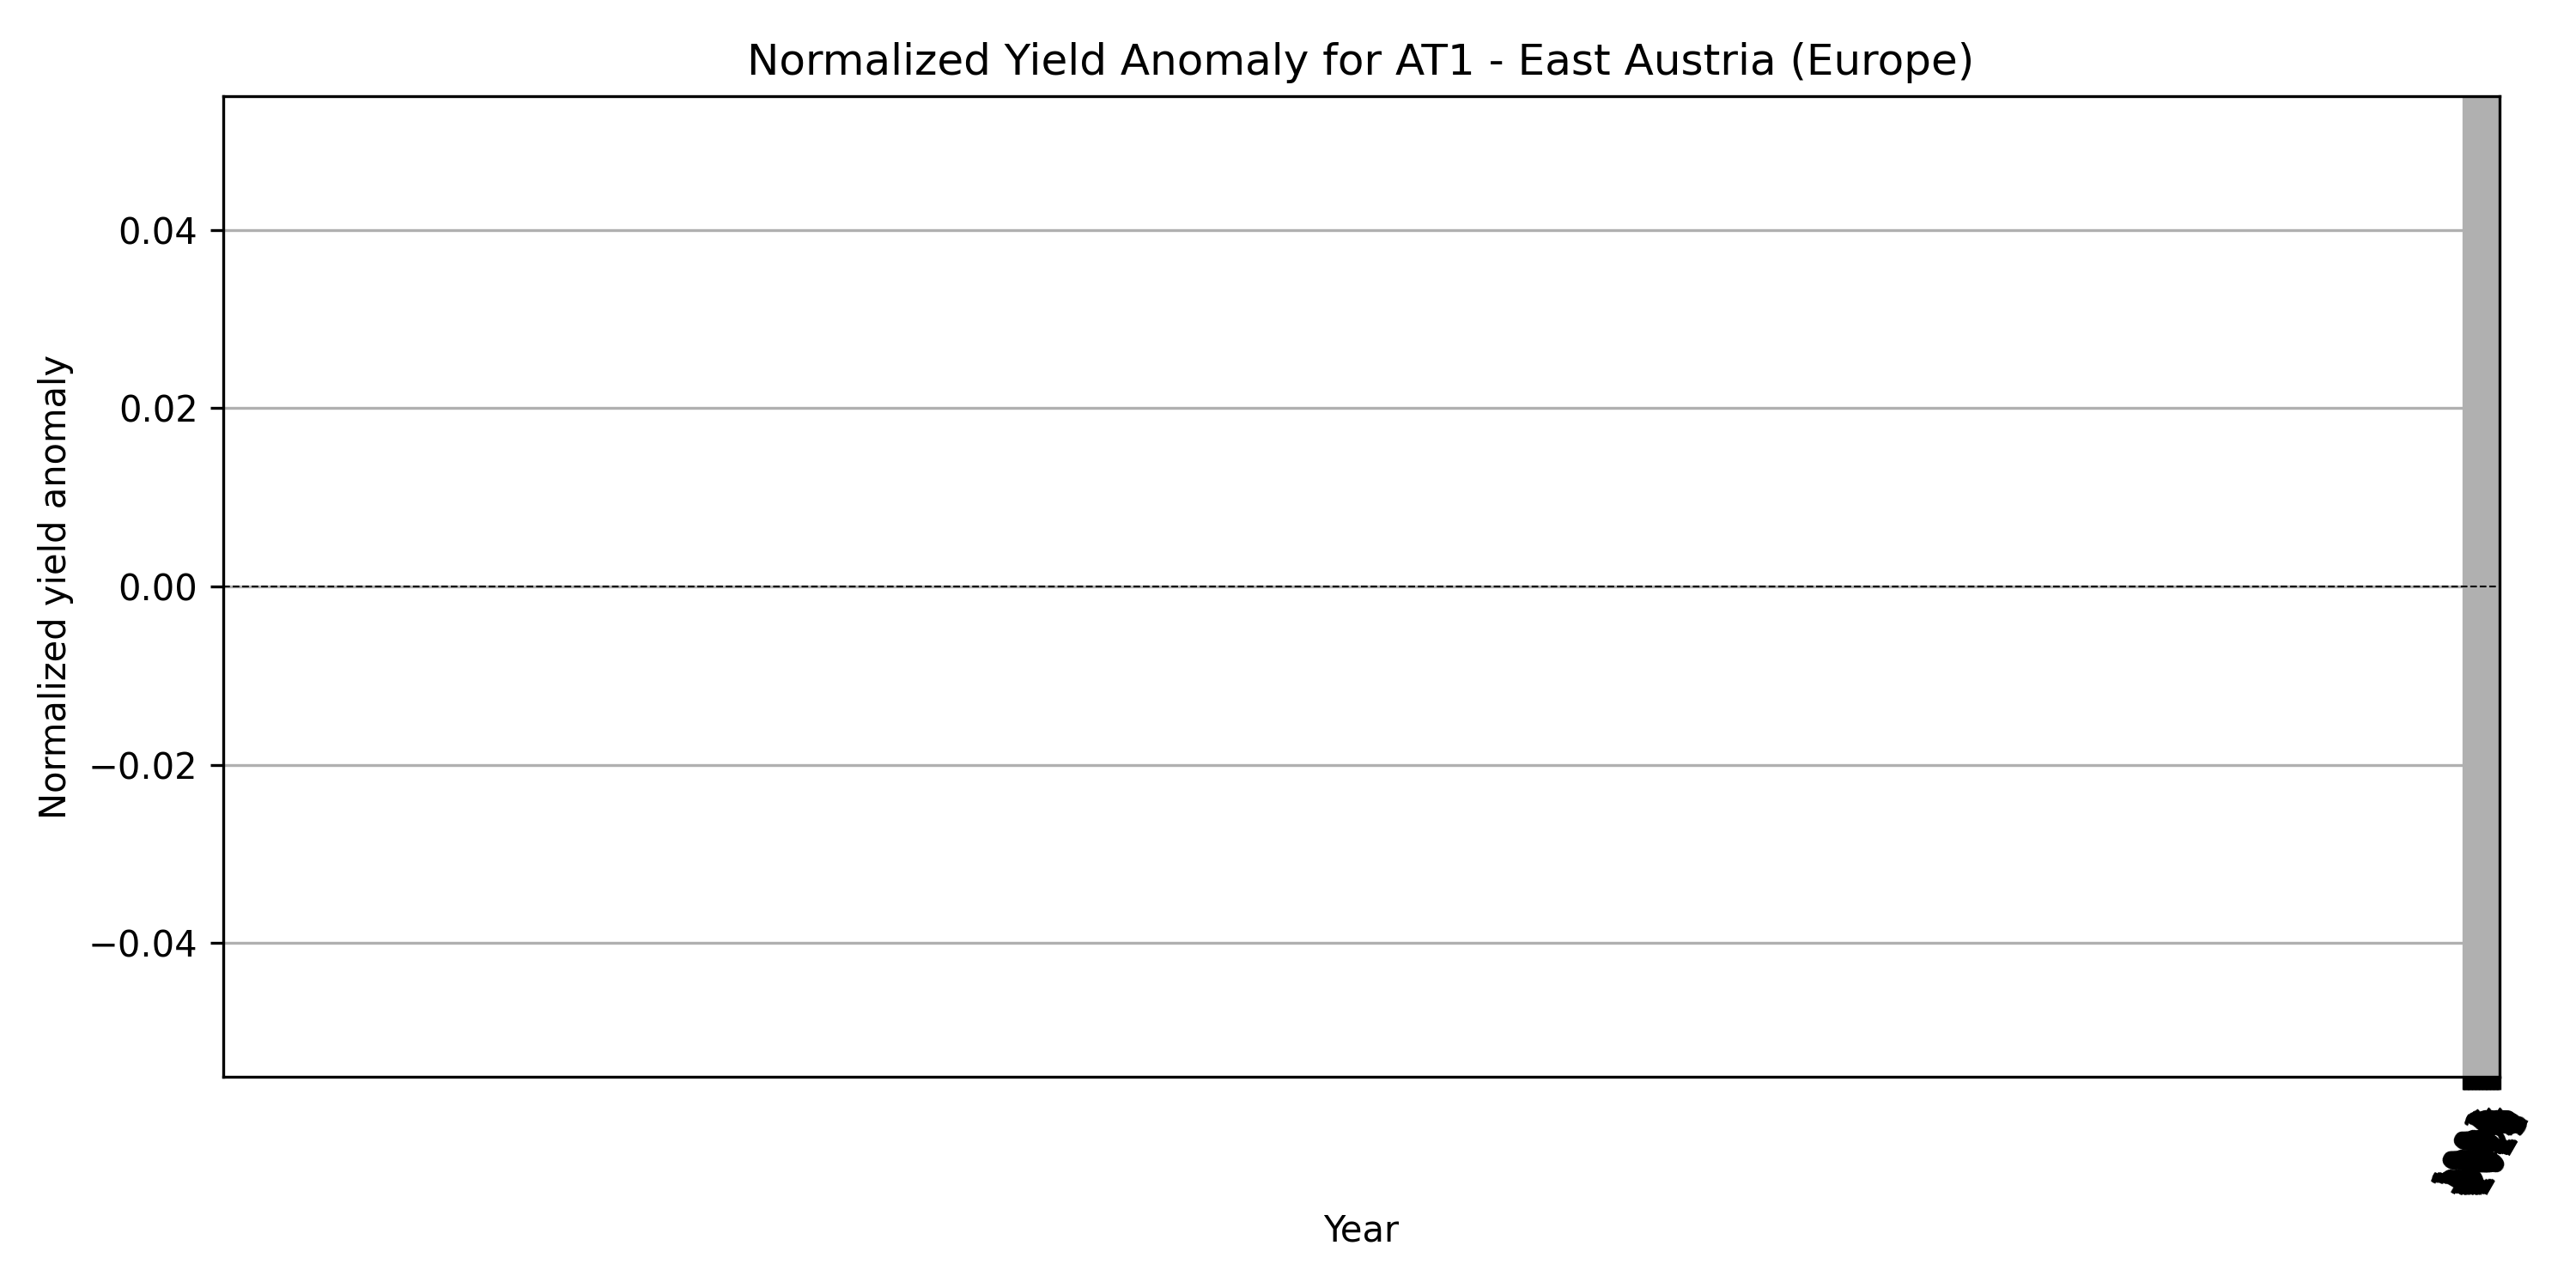

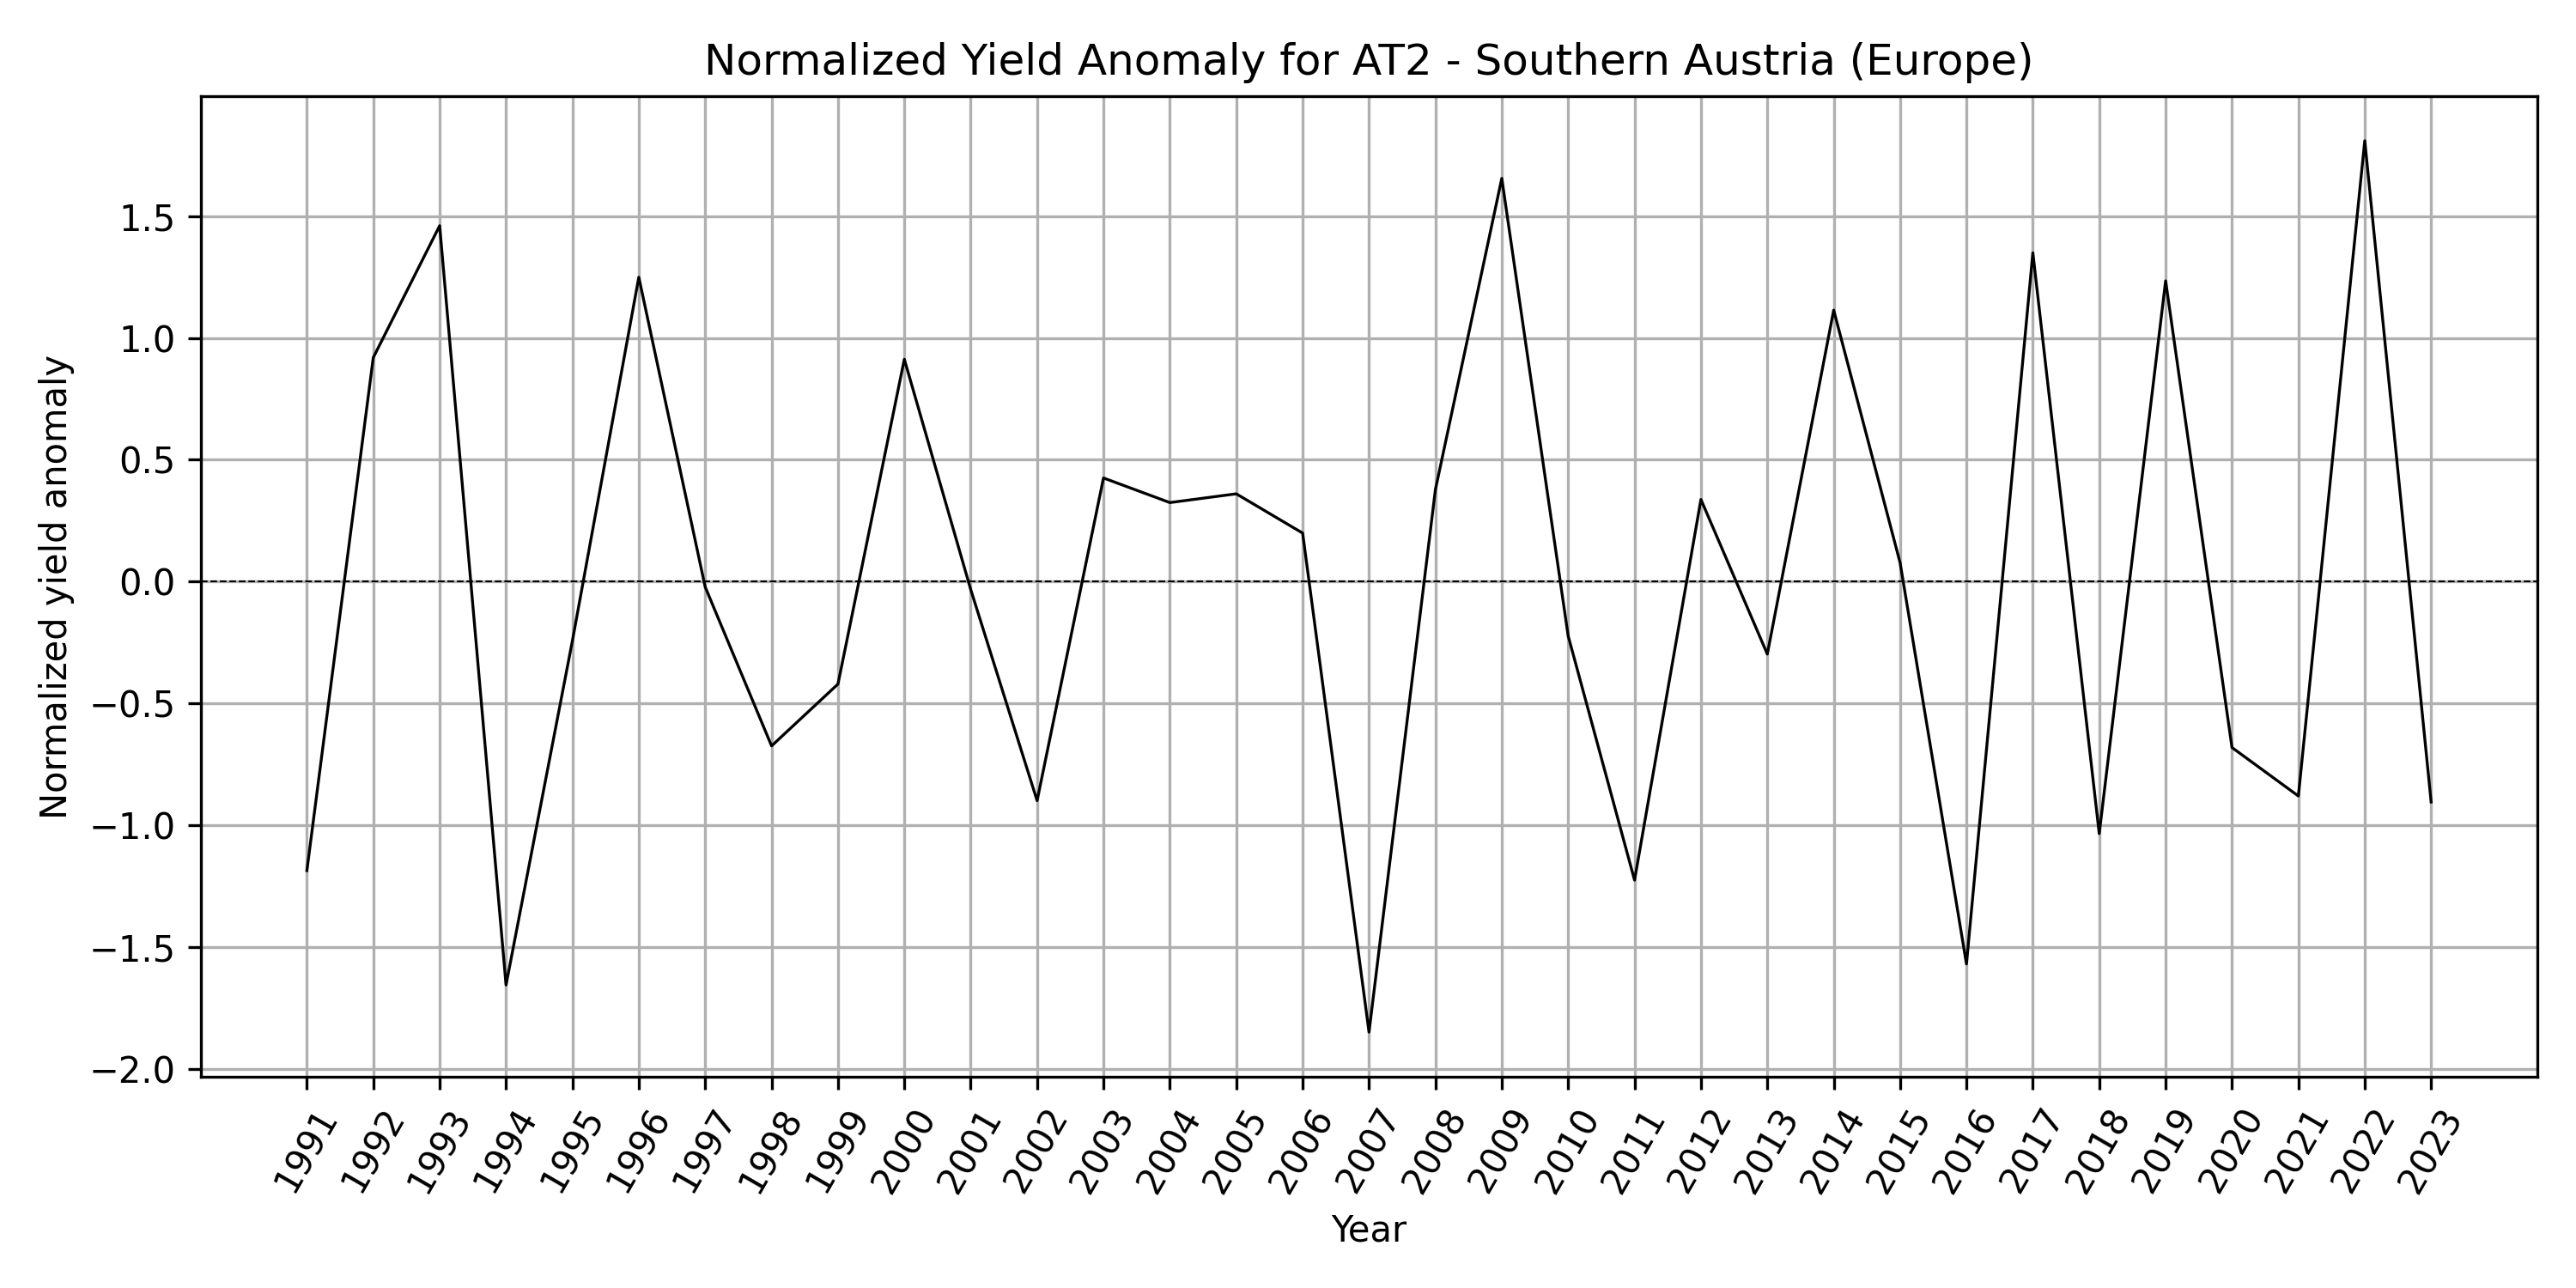

In [ ]:
# Anomaly series
if not os.path.exists(f"{config.yield_config.FIGURES_DIR}/{selected_region}/anomaly_series_normalized"):
	os.system(f"python scripts/yield_script.py -vz --plot_anomaly_series --region {selected_region} --anomaly_type normalized --save_plot")

image_dir = f"{config.yield_config.FIGURES_DIR}/{selected_region}/anomaly_series_normalized"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for img_file in image_files[:3]:
	image_path = os.path.join(image_dir, img_file)
	display(Image(filename=image_path, width=400))


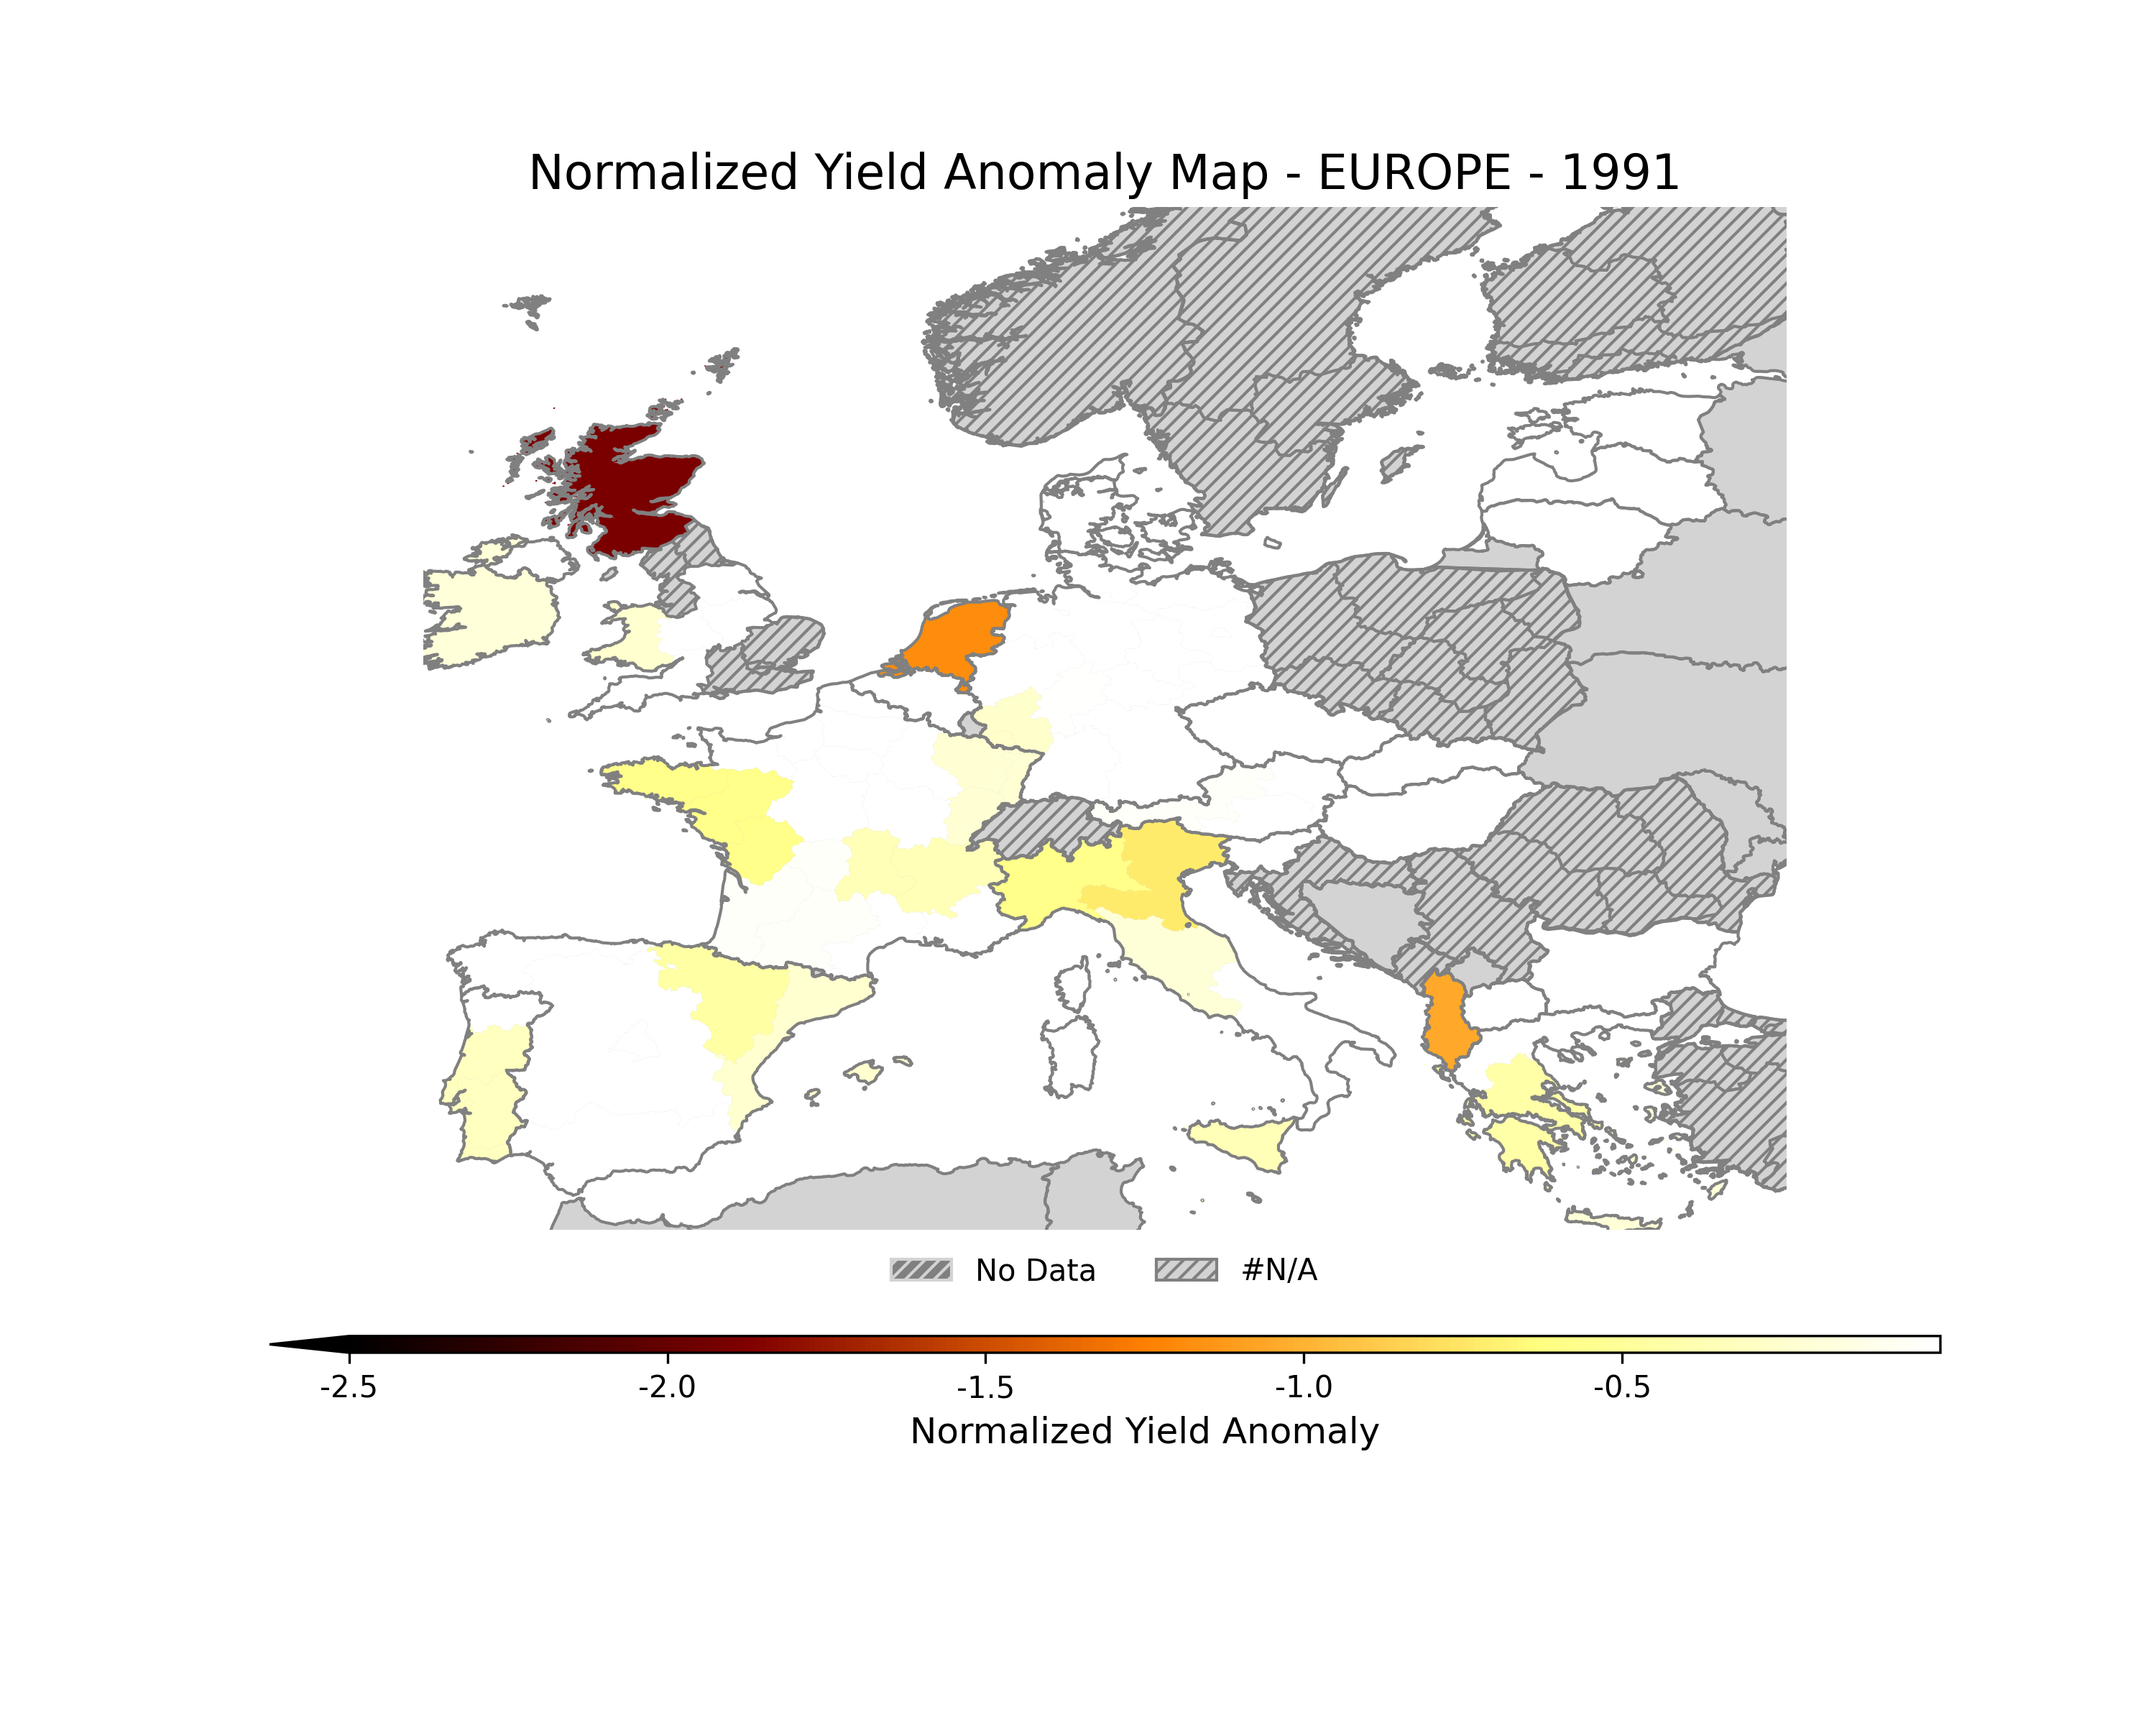

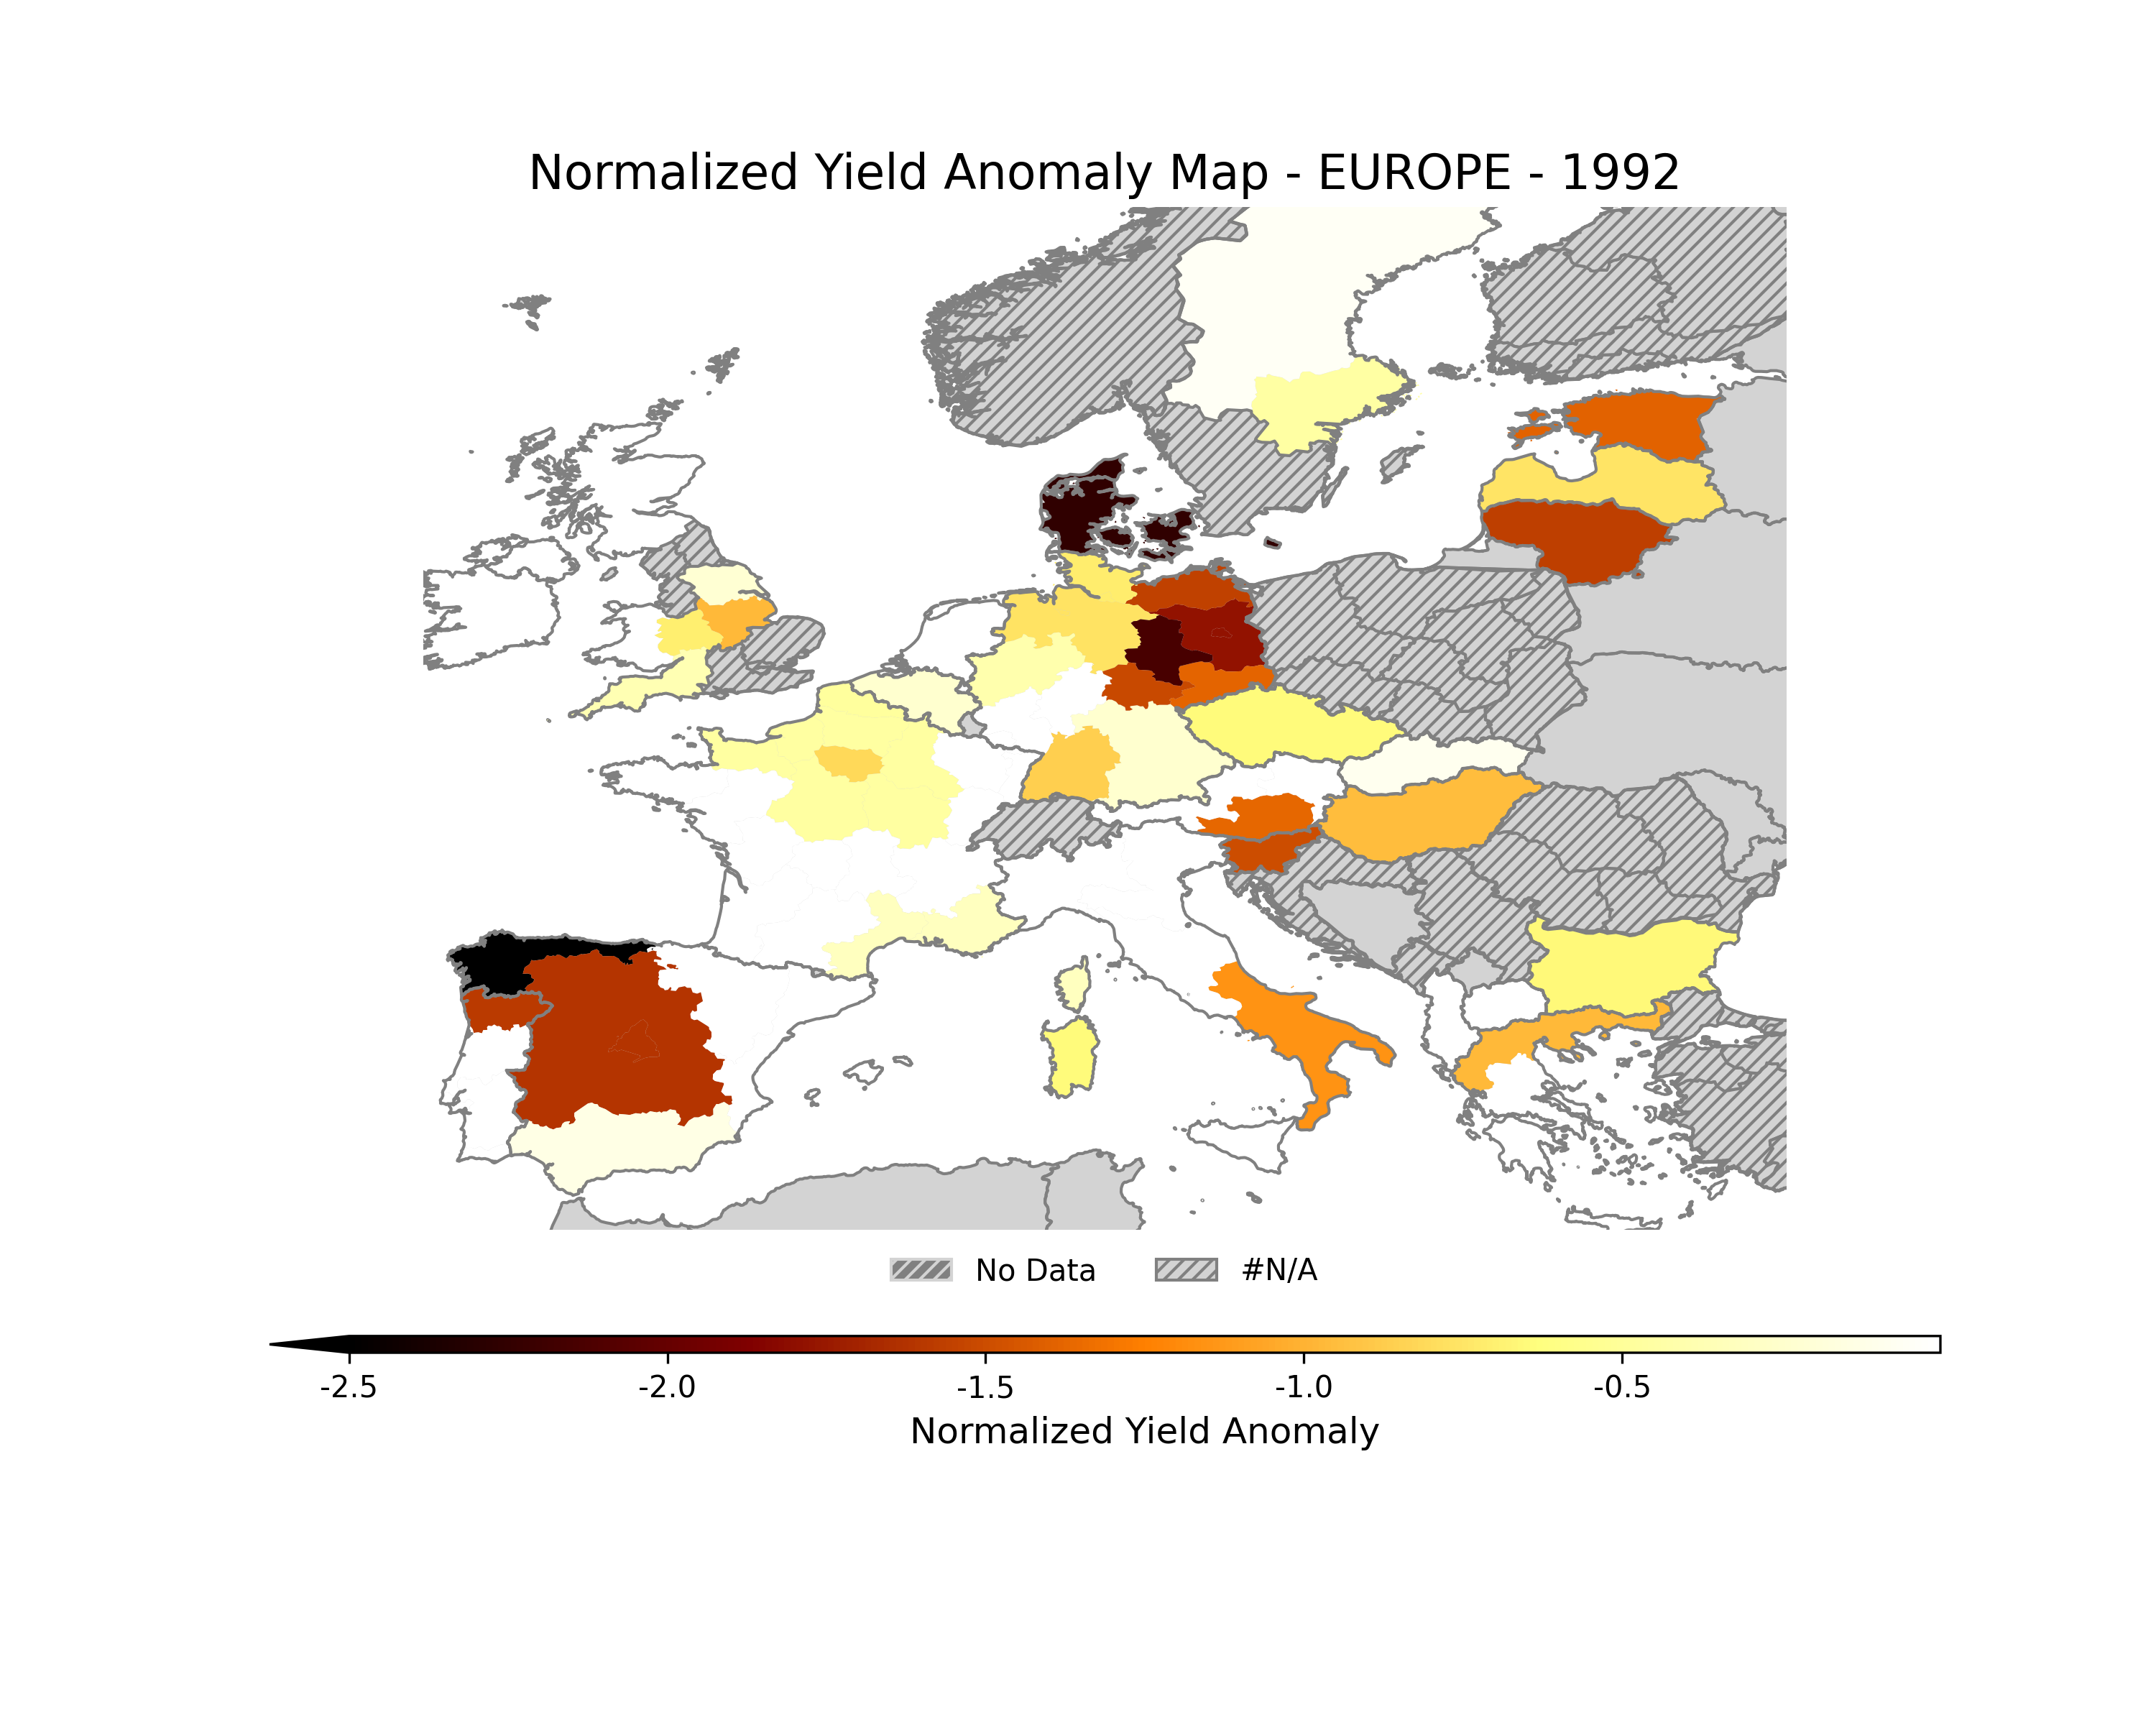

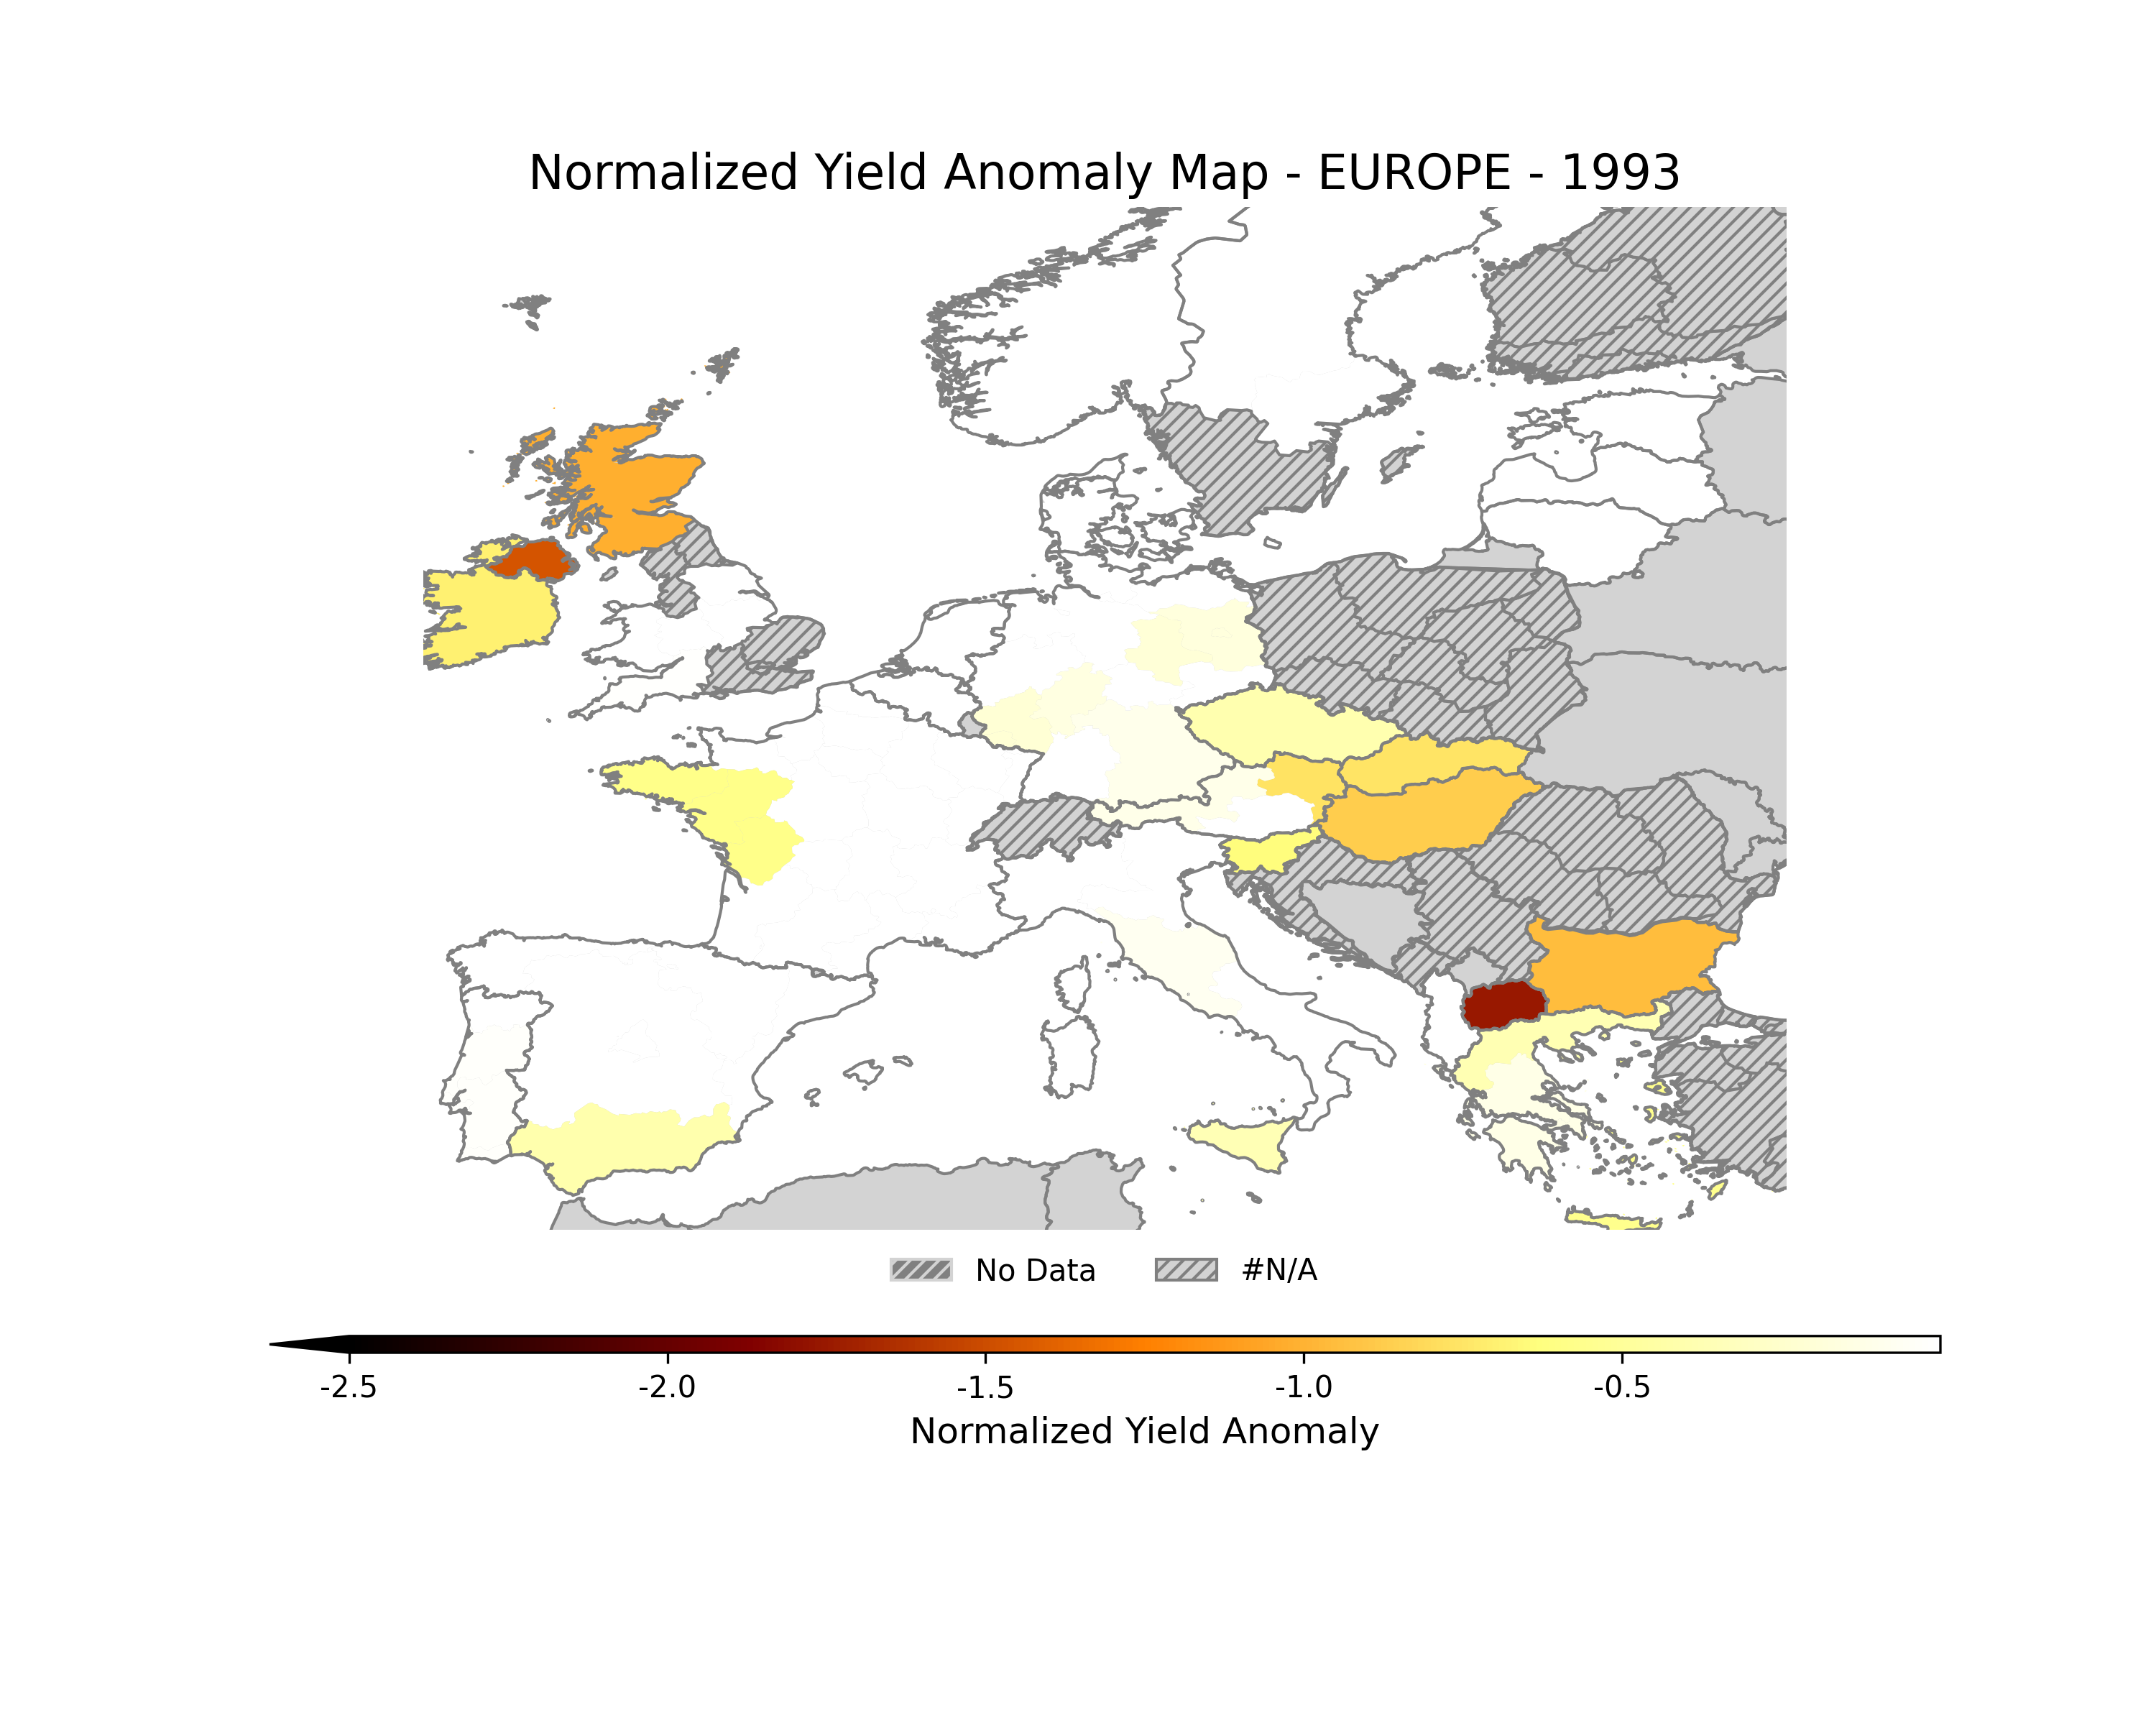

In [78]:
# Anomaly maps
if not os.path.exists(f"{config.yield_config.FIGURES_DIR}/{selected_region}/anomaly_map"):
	os.system(f"python scripts/yield_script.py -vz --plot_anomaly_map --region {selected_region} --save_plot")

image_dir = f"{config.yield_config.FIGURES_DIR}/{selected_region}/anomaly_map"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for img_file in image_files[:3]:
	image_path = os.path.join(image_dir, img_file)
	display(Image(filename=image_path, width=400))

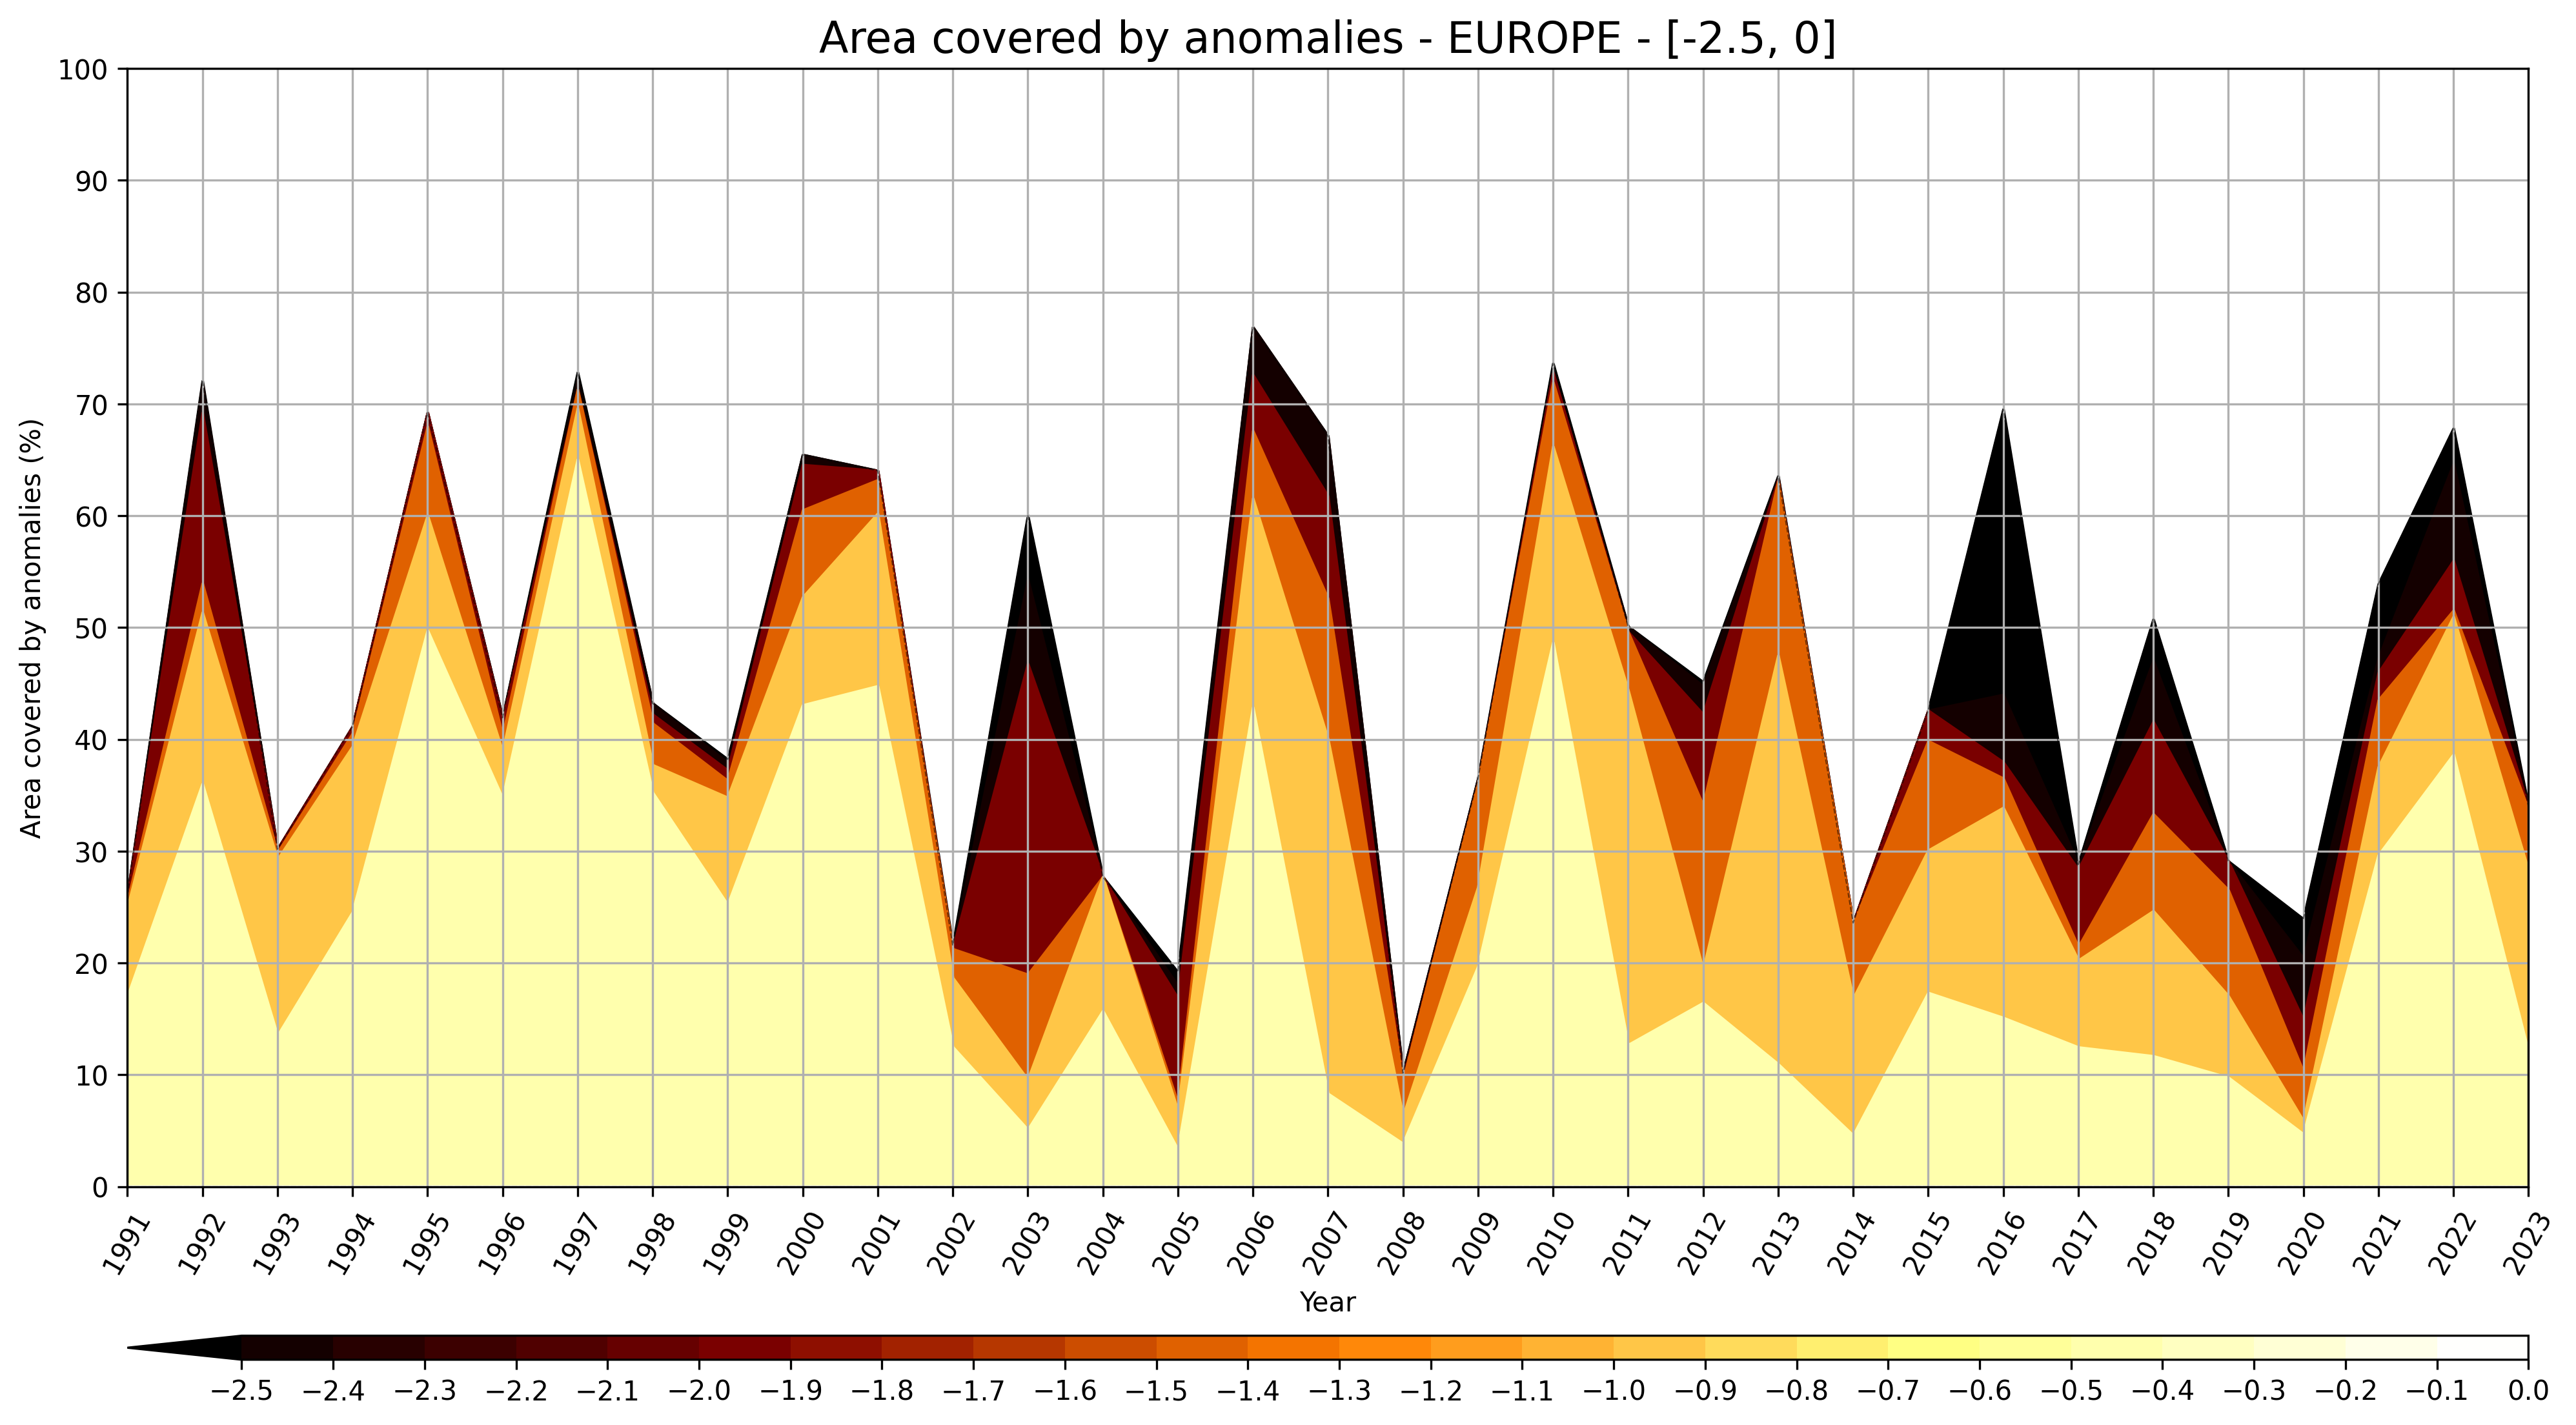

In [79]:
# Anomaly covered area
if not os.path.exists(f"{config.yield_config.FIGURES_DIR}/{selected_region}/anomaly_covered_area"):
	os.system(f"python scripts/yield_script.py -vz --plot_area_covered --region {selected_region} --save_plot")

image_dir = f"{config.yield_config.FIGURES_DIR}/{selected_region}/anomaly_covered_area"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for img_file in image_files[:3]:
	image_path = os.path.join(image_dir, img_file)
	display(Image(filename=image_path, width=400))
